In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:

# Set random seed for reproducibility
np.random.seed(42)

In [13]:
# Define the parameters of the multivariate normal distribution
# For this example, I'll use arbitrary values

mu = np.array([2.0, 0.5])
Sigma = np.array([
    [1.0, 0.6],
    [0.6, 1.0]])

Monte Carlo estimate of P(w₁ > w₂): 0.950
Empirical variance: 0.048
Monte Carlo Standard Error: 0.010


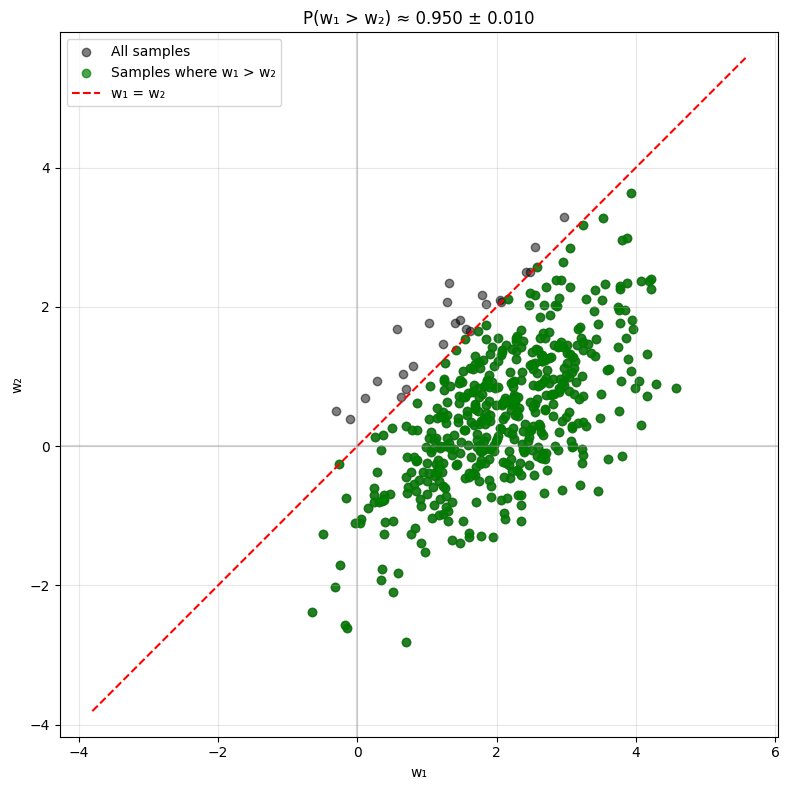

In [14]:
# Number of samples 
S = 500 

# Generate S samples from the multivariate normal distribution 
samples = np.random.multivariate_normal(mu, Sigma, size=S)

# check which samples have w_1 > w_2 
indicator = (samples[:, 0] > samples[:, 1]).astype(float)

# caltulate monte carlo estimate of P(W_1 > W_2)
# Calculate the Monte Carlo estimate of P(w₁ > w₂)
prob_estimate = np.mean(indicator)
# calculat ethe empirical variance of the indicator 
empirical_variance = np.var(indicator, ddof=1) # using unbiased estimator 

# Calculate the Monte Carlo Standard Error
mcse = np.sqrt(empirical_variance / S)

# Print the results
print(f"Monte Carlo estimate of P(w₁ > w₂): {prob_estimate:.3f}")
print(f"Empirical variance: {empirical_variance:.3f}")
print(f"Monte Carlo Standard Error: {mcse:.3f}")

# Create a visualization similar to the one in the example
plt.figure(figsize=(8, 8))
plt.scatter(samples[:, 0], samples[:, 1], c='black', alpha=0.5, label='All samples')
plt.scatter(samples[indicator == 1, 0], samples[indicator == 1, 1], 
            c='green', alpha=0.7, label='Samples where w₁ > w₂')

# Add the line w₁ = w₂
x = np.linspace(min(samples[:, 0].min(), samples[:, 1].min()) - 1,
                max(samples[:, 0].max(), samples[:, 1].max()) + 1, 100)
plt.plot(x, x, 'r--', label='w₁ = w₂')

plt.xlabel('w₁')
plt.ylabel('w₂')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
plt.legend()
plt.title(f'P(w₁ > w₂) ≈ {prob_estimate:.3f} ± {mcse:.3f}')
plt.axis('equal')
plt.tight_layout()
plt.show()
